In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
class PCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        
    def fit(self, X):
        m = X.shape[0]
        X_mean = np.mean(X, axis=0)
        X_stand = X - X_mean
        cov_matrix = np.dot(X_stand.T, X_stand) / (m - 1)
        
        eig_values, eig_vector = np.linalg.eig(cov_matrix)
        pairs = [(eig_values[i], eig_vector[:,i]) for i in range(eig_vector.shape[1])]
        pairs.sort(key=lambda eig: eig[0], reverse=True)
        return pairs, eig_values

In [87]:
X = np.random.randint(1, 100, [1000, 2])
y = np.array([i for i in range(1000)])[:, np.newaxis]
y = np.concatenate((y, y), axis=1)
X = np.concatenate((y, X), axis=1)
pca = PCA()
pairs, eig = pca.fit(X)

In [88]:
np.round(eig / sum(eig) * 100, 2)

array([99.03,  0.  ,  0.48,  0.49])

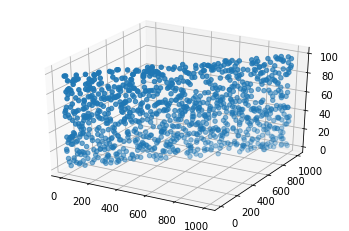

In [89]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2])